In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

<AxesSubplot:>

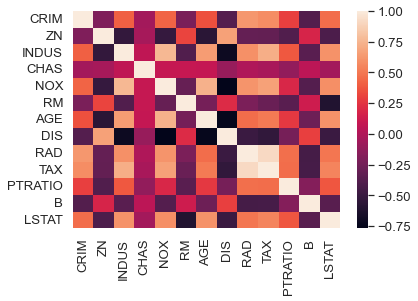

In [115]:
# Loading Dataset
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
sns.heatmap(boston_df.corr())

In [116]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [117]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [118]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [119]:
class LinearRegression:
    def fit(self,X,y,max_iter=1000,alpha=0.01):
        def gradientDescent(X,y,max_iter,alpha):
            m,n=X.shape[0],X.shape[1]+1

            theta=np.random.randn(n).reshape((1,n))
            # Adding a column-vector with all 1 for intercept
            X=np.append(np.ones((m,1)),X,axis=1)
            y=y.reshape((m,1))

            for _ in range(max_iter):
                y_pred=X.dot(theta.T)
                error=y_pred-y
                
                gradient = (1 / m) * X.T.dot(error)
                theta -= alpha * gradient.T
                
            return theta
        
        self.theta=gradientDescent(X,y,max_iter,alpha)

    def predict(self,X):
        m=X.shape[0]
        X=np.append(np.ones((m,1)),X,axis=1)
        y_pred = X.dot(self.theta.T)
        return y_pred.reshape((m,1))
    


In [120]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([[28.06720136],
       [15.41995966],
       [15.81336305],
       [20.24820588],
       [26.7622068 ],
       [24.26999277],
       [39.92867276],
       [18.80270192],
       [16.38897729],
       [18.45329928],
       [19.59574584],
       [34.78443519],
       [ 4.59867653],
       [24.01319067],
       [20.88162963],
       [14.99111024],
       [11.87479584],
       [17.18799333],
       [25.21326119],
       [24.1991824 ],
       [29.57463888],
       [30.16916244],
       [19.00458074],
       [14.34168512],
       [30.12540167],
       [17.77679146],
       [31.36829542],
       [25.00065293],
       [-1.34309265],
       [23.44192518],
       [25.59137941],
       [25.74473542],
       [22.51976216],
       [40.67616085],
       [17.35914891],
       [20.44280085],
       [36.24549111],
       [10.85494222],
       [16.53757664],
       [12.46666666],
       [31.72125431],
       [19.42536215],
       [27.93219502],
       [29.89395014],
       [17.13610356],
       [21

Text(0.5, 1.0, 'Predicted-Values')

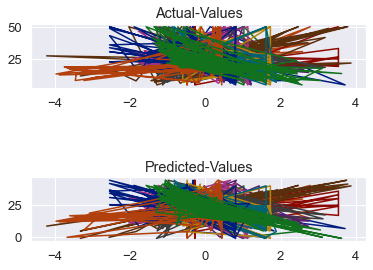

In [121]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, y_pred)
plt.title("Predicted-Values")


`SK-Learns Model Prediction`

In [122]:
from sklearn.linear_model import LinearRegression as Lin_Reg
sk_model=Lin_Reg()
sk_model.fit(X_train,y_train)
sk_pred=sk_model.predict(X_test)
sk_pred

array([28.31244606, 15.17014245, 15.7282889 , 20.06676265, 26.68364906,
       24.60574466, 39.82352583, 19.13962613, 16.07969292, 18.2144437 ,
       19.41733328, 34.79508826,  5.17633583, 24.2713785 , 21.16821987,
       14.84680087, 11.90981476, 16.95292636, 25.51124886, 23.83241725,
       30.02896907, 30.35596729, 19.25522895, 13.78456837, 30.0563296 ,
       17.65060552, 31.37277652, 25.08451035, -0.95176595, 23.49632649,
       25.91305152, 26.03670182, 22.700982  , 40.10513681, 17.26327342,
       20.66585169, 36.12371191, 10.80485666, 16.99964661, 11.81247033,
       31.77447181, 19.80235332, 28.01745998, 29.95813403, 17.42363814,
       21.01613744, 31.31514523, 22.07909749, 30.3251065 , 21.79291843,
       23.06980658, 34.03174817, 22.81839272, 18.31364032, 11.06773866,
       33.91398625,  6.36882691, 20.33862505, 31.39855291, 38.8776118 ,
       36.49985283, 12.75626406, 26.3848518 , 31.39223161, 16.08267133,
       28.75133361,  5.17906215, 13.86880357, 23.46750855, 16.76

Text(0.5, 1.0, 'Sk-learns Predicted-Values')

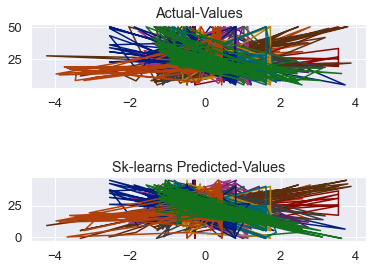

In [123]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, sk_pred)
plt.title("Sk-learns Predicted-Values")

In [124]:
my_mse = mean_squared_error(y_test, y_pred)
my_r2 = r2_score(y_test, y_pred)

sk_mse = mean_squared_error(y_test, sk_pred)
sk_r2 = r2_score(y_test, sk_pred)

print("My Mean Squared Error: ", my_mse)
print("My R-squared: ", my_r2)
print("sk-learns Mean Squared Error: ", sk_mse)
print("sk-learns R-squared: ", sk_r2)

My Mean Squared Error:  37.209680072184746
My R-squared:  0.6164324829542707
sk-learns Mean Squared Error:  36.37299990197442
sk-learns R-squared:  0.6250572100367504
